In [1]:
import codecs
from bs4 import BeautifulSoup
import random
from collections import Counter
from textblob import TextBlob
import re
import wordcloud as wc
import matplotlib.pyplot as plt
import pandas as pd

### What are my ad interests? Categories and whether I think if they are accurate:

In [2]:
ads_interest = codecs.open("C:/Users/Athena Huang/Documents/NEU/DS/DS2500/final project/ads_interests.html", "r","utf-8")
formatted_html = BeautifulSoup(ads_interest)

In [3]:
# initial list
interests = []
# find the class which encodes the information we want
for everything in formatted_html.find_all(class_ = '_51m- _2pin _2piu _23bw _51mw'):
    for thing in everything.find_all("div"):
        interest = thing.text.strip()
        interests.append(interest)
random.choices(interests, k=10)

['Blue (Color)',
 'Apple Music',
 'Management consulting',
 'Heavy metal music',
 'Beauty & Fashion',
 'Street art',
 'Country music',
 'Brown (Color)',
 'Desserts',
 'Under Armour']

In [6]:
df_interests = pd.DataFrame(interests,columns = ["interests"])
df_interests.to_csv('interests.csv', index=False)

In [7]:
# I had to mannually decide whether those hobbies were true or not
df_interest_tf = pd.read_csv("interests.csv")
df_interest_tf.head()

,interests,tf
0,Online shopping,t
1,Cosmetics,t
2,Shopping,t
3,Luxury goods,t
4,Beauty salons,f


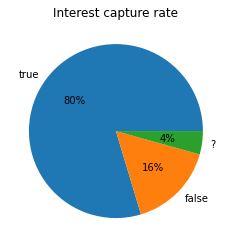

In [20]:
# to watch degree are my hobbies real?
tf_list = [0,0,0]
for thing in df_interest_tf["tf"]:
    if thing == "t":
        tf_list[0] += 1
    if thing == "f":
        tf_list[1] += 1
    if thing == "?":
        tf_list[2] += 1
labels = ["true","false","?"]
plt.pie(tf_list, labels = labels,autopct='%1.0f%%')
plt.title("Interest capture rate")
plt.show()

### Followers: who is following me back and who isn't (how the unfollow apps gets their data)

In [68]:
# my own how many people I follow do not follow me back:
followers = codecs.open("C:/Users/Athena Huang/Documents/NEU/DS/DS2500/final project/followers.html", "r","utf-8")
followers_html = BeautifulSoup(followers)
followers_list = []
# find the class which encodes the information we want
for everything in followers_html.find_all(class_ = '_2let'):
    for thing in everything.find_all("div"):
        follower = thing.text.strip()
        followers_list.append(follower)
followers_list = followers_list[1::3]

In [80]:
# my followings
following = codecs.open("C:/Users/Athena Huang/Documents/NEU/DS/DS2500/final project/following.html", "r","utf-8")
followings_html = BeautifulSoup(following)
following_list = []
# find the class which encodes the information we want
for everything in followings_html.find_all(class_ = '_2let'):
    for thing in everything.find_all("div"):
        follow = thing.text.strip()
        following_list.append(follow)
following_list = following_list[1::3]

In [94]:
not_following_me_back = []
for follow in following_list:
    if follow in followers_list:
        continue
    else:
        not_following_me_back.append(follow)
print(str(len(not_following_me_back)) + " do not follow me back wow")
random.choices(not_following_me_back, k=10)

197 do not follow me back wow


['juanpazurita',
 'barackobama',
 'yugnat999',
 'emmanuelmacron',
 'clara.sandler',
 'angelicaberasg',
 'dearpwi',
 'turksandcaicos',
 'yugnat999',
 'verzuztv']

### My liking habbits on Instagram

In [22]:
# whose post have I liked the most?
liked_posts = codecs.open("C:/Users/Athena Huang/Documents/NEU/DS/DS2500/final project/liked_posts.html", "r","utf-8")
liked = BeautifulSoup(liked_posts)

In [23]:
likes = []
for everything in liked.find_all(class_ = '_3-95 _2pim _2lek _2lel'):
    like = everything.text.strip()
    likes.append(like)
top_10_people_most_liked = Counter(likes).most_common(10)
top_10_people_most_liked

[('pubity', 467),
 ('yugnat999', 396),
 ('chiaraferragni', 295),
 ('shitheadsteve', 265),
 ('memequeen', 261),
 ('so.mexican', 185),
 ('confessed', 176),
 ('neu_gigs', 175),
 ('3.1415926535897932384626433832', 170),
 ('theellenshow', 153)]

<BarContainer object of 10 artists>

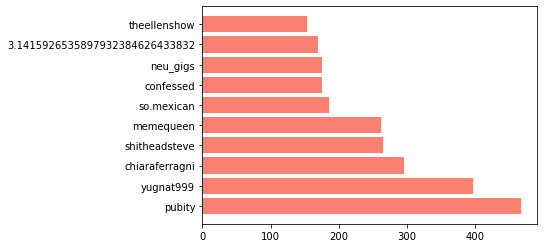

In [40]:
# plotting how much likes I gave to the top 10 people
persons = []
likes_i_gave = []
for person in top_10_people_most_liked:
    for thing in person:
        persons.append(thing)
        likes_i_gave.append(thing)
persons = persons[0::2]
likes_i_gave = likes_i_gave[1::2]
plt.barh(persons,likes_i_gave, color = "salmon")

### Reels: my sentiments

In [118]:
# sentiments
reel_sentiments = codecs.open("C:/Users/Athena Huang/Documents/NEU/DS/DS2500/final project/your_reels_sentiments.html", "r","utf-8")
reel_html = BeautifulSoup(reel_sentiments)
reel_feels = []
for everything in reel_html.find_all(class_ = "_51m- _2pin _2piu _23bw _51mw"):
    reel = everything.text.strip()
    reel_feels.append(reel)

In [120]:
reel_feels

['Adorable',
 'Emotional',
 'Exciting',
 'Fascinating',
 'Funny',
 'Inspiring',
 'Relaxing',
 'Surprising']

In [119]:
pol = 0
sub = 0
for word in reel_feels:
    polarity, subjectivity = TextBlob(word).sentiment
    pol += polarity
    sub += subjectivity
print("general polarity " + str(round(pol / len(reel_feels),2)))
print("general subjectivity " + str(round(sub / len(reel_feels),2)))

general polarity 0.37
general subjectivity 0.73


### Am I interested in the topics Instagram thinks I'm interested in？

In [44]:
# topics 
reel_topics = codecs.open("C:/Users/Athena Huang/Documents/NEU/DS/DS2500/final project/your_reels_topics.html", "r","utf-8")
reel_topics_html = BeautifulSoup(reel_topics)
topics = []
for everything in reel_topics_html.find_all(class_ = "_51m- _2pin _2piu _23bw _51mw"):
    topic = everything.text.strip()
    topics.append(topic)
random.choices(topics,k=10)

['Food and Drink',
 'Vehicles and Transportation',
 'Social Interests',
 'Food and Drink',
 'Outdoor Nature',
 'Fandom',
 'Vehicles and Transportation',
 'Religion and Spirituality',
 'Sharing an Event',
 'TV and Movies']

In [45]:
df_reel_topics = pd.DataFrame(topics,columns = ["reel_topics"])
df_reel_topics.to_csv('reel_topics.csv', index=False)

In [46]:
# I had to mannually decide whether those topics were true or not
df_reel_tf = pd.read_csv("reel_topics.csv")
df_reel_tf.head()

,reel_topics,tf
0,Trick Stunts,t
1,Comedy,t
2,Lip Syncing,f
3,Outdoor Nature,t
4,Fandom,t


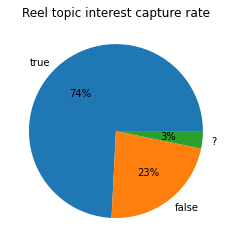

In [49]:
# to watch degree are my reel topics accurate?
tf_list = [0,0,0]
for thing in df_reel_tf["tf"]:
    if thing == "t":
        tf_list[0] += 1
    if thing == "f":
        tf_list[1] += 1
    if thing == "?":
        tf_list[2] += 1
labels = ["true","false","?"]
plt.pie(tf_list, labels = labels,autopct='%1.0f%%')
plt.title("Reel topic interest capture rate")
plt.show()

### next, we dive into more specific topics:

In [50]:
# topics 
topic_topics = codecs.open("C:/Users/Athena Huang/Documents/NEU/DS/DS2500/final project/your_topics.html", "r","utf-8")
topic_topics_html = BeautifulSoup(topic_topics)
topics_lots = []
for everything in topic_topics_html.find_all(class_ = "_51m- _2pin _2piu _23bw _51mw"):
    topic = everything.text.strip()
    topics_lots.append(topic)
random.choices(topics_lots,k=10)

['Facial Hair Styles',
 'Rice, Grains & Noodles',
 'Public Transportation',
 'Visual Artists & Creators',
 'Huskies',
 'Camera operator [beta]',
 'Yoga',
 'Cuisines of Asia',
 'Pet Ownership',
 'Paris (FR city)']

In [51]:
df_topics = pd.DataFrame(topics_lots,columns = ["specific_topics"])
df_topics.to_csv('topics.csv', index=False)

In [52]:
# I had to mannually decide whether those topics were true or not
df_topics_tf = pd.read_csv("topics.csv")
df_topics_tf.head()

,specific_topics,tf
0,Camera operator [beta],f
1,Netflix (Company),t
2,Fish (animal),t
3,Video Game Cosplay,t
4,Dining Room Furniture,f


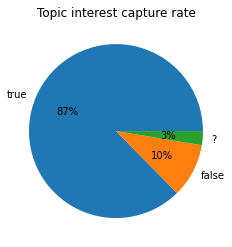

In [53]:
# to watch degree are my reel topics accurate?
tf_list = [0,0,0]
for thing in df_topics_tf["tf"]:
    if thing == "t":
        tf_list[0] += 1
    if thing == "f":
        tf_list[1] += 1
    if thing == "?":
        tf_list[2] += 1
labels = ["true","false","?"]
plt.pie(tf_list, labels = labels,autopct='%1.0f%%')
plt.title("Topic interest capture rate")
plt.show()

### All the comments I've ever made on Instagram: what do I type the most?

In [41]:
post_comments = codecs.open("C:/Users/Athena Huang/Documents/NEU/DS/DS2500/final project/post_comments.html", "r","utf-8")
comments_html = BeautifulSoup(post_comments)

In [42]:
comments = []
for everything in comments_html.find_all(class_ ="_2let"):
    for thing in everything.find_all("div"):
        comment = thing.text.strip()
        comments.append(comment)
comments = comments[1::4]
comments_without_tag = []

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F900-\U0001F9FF"
        u"\U00002600-\U00002800"
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

for comment in comments:
    sentence = ""
    single_comment = comment.split()
    for word in single_comment:
        if word[0] == "@":
            continue
        else:
            sentence += " " + word
    #sentence = emoji_pattern.sub(r'', sentence)
    comments_without_tag.append(sentence)

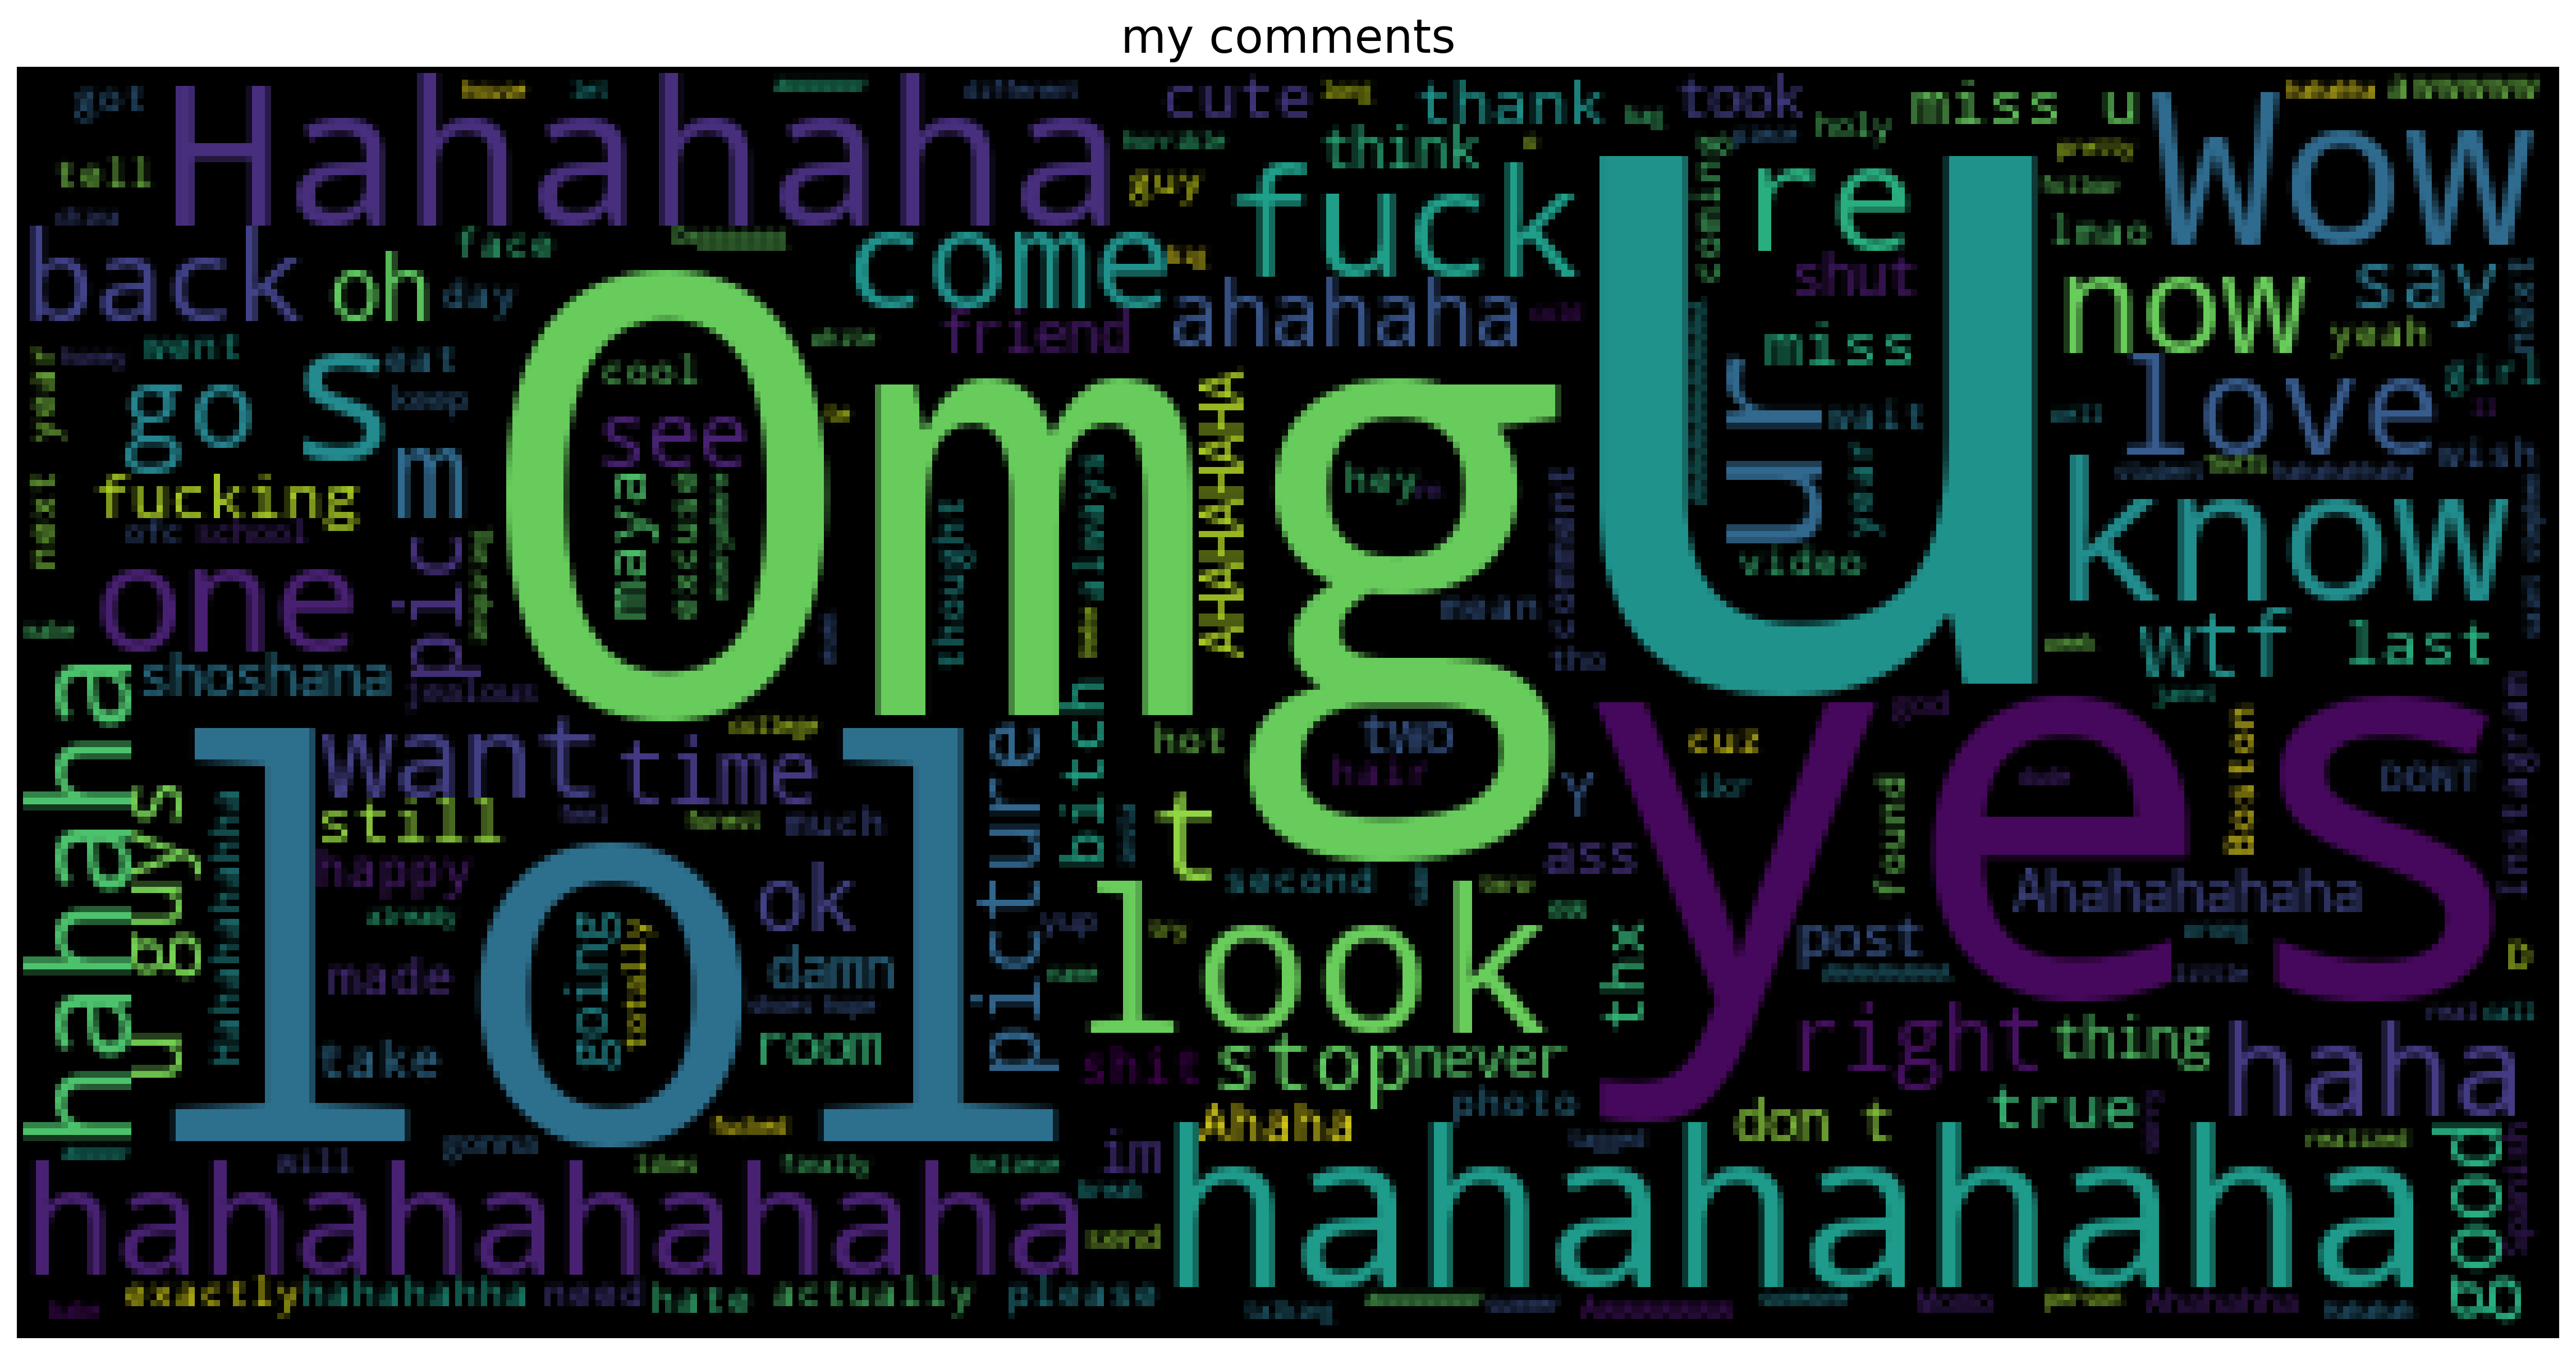

In [54]:
full_list_comment = ""
for sentence in comments_without_tag:
    full_list_comment += sentence  + " "
cloud = wc.WordCloud() # Defaults
comment_cloud = cloud.generate(full_list_comment)
fig=plt.figure(figsize=(20,10), dpi=300)
plt.title("my comments", fontsize = 20)
plt.imshow(comment_cloud)
plt.axis('off')
plt.show()